1. Take the Lena image and convert it into gray scale image. Scale it by factors of 1,2,0.5 using bilinear interpolation methods. Display the scaled images. Also, display the output of built-in functions for doing scaling by factors of 0.5,1 and  2.
2. Compare the results.

Note: Implement bilinear  interpolation methods using user defined functions as well as built-in functions.

In [1]:
# This Assignment is done by CS20B1044 Avinash R Changrani
# importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./Lena.png')

# show the image using cv2

cv2.imshow('Original image',img)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [3]:
# convert lena image to gray scale image

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the image
cv2.imshow('Gray Scaled Image',img)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [4]:
# Using Inbuilt functions

# Scale the img by a factor of 1 using bilinear interpolation
img1 = cv2.resize(img, None, fx=1, fy=1, interpolation=cv2.INTER_LINEAR)

# Scale the img by a factor of 2 using bilinear interpolation
img2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Scale the img by a factor of 0.5 using bilinear interpolation
img3 = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)


In [5]:
# Display all the scaled images
cv2.imshow('Image Scaled by 1 (Inbuilt)',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Image Scaled by 2 (Inbuilt)',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Image Scaled by 0.5 (Inbuilt)',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()


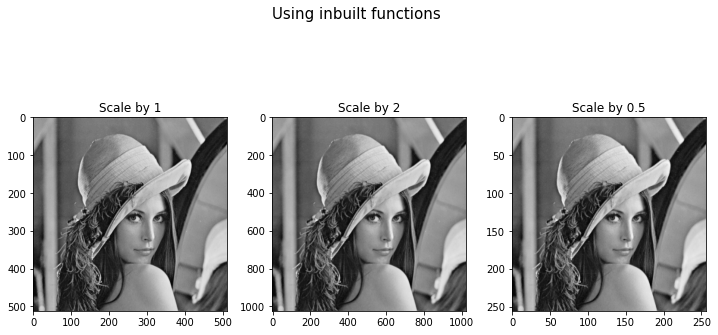

In [6]:
# Compare the images by displaying them side by side using matplotlib
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.4, top=0.85)

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Scale by 1')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Scale by 2')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img3, cmap='gray')
ax3.set_title('Scale by 0.5')

fig.tight_layout()
fig.suptitle("Using inbuilt functions", fontsize=15)
plt.show()

In [7]:
# User defined bilinear interploation fucntion
def bilinear_interpolation(img, scale_factor):
    # get the height and width of the image
    height, width = img.shape

    # create a new image with the new height and width
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    new_img = np.zeros((new_height, new_width))

    # calculate the scaling factor
    scale_x = (width - 1) / new_width
    scale_y = (height - 1) / new_height

    # loop through the new image and calculate the corresponding pixel values
    for i in range(new_height):
        for j in range(new_width):
            # get the coordinates of the corresponding pixel in the original image
            x = (j * scale_x)
            y = (i * scale_y)
            # get the integer and fractional parts of the pixel coordinates
            x1 = int(x)
            x2 = x1 + 1
            y1 = int(y)
            y2 = y1 + 1
            # calculate the pixel value of the new pixel
            new_img[i, j] = (x2 - x) * (y2 - y) * img[y1, x1] + (x2 - x) * (y - y1) * img[y2, x1] + (x - x1) * (y2 - y) * img[y1, x2] + (x - x1) * (y - y1) * img[y2, x2]

    return new_img

In [8]:
# Using User defined Functions
# Scale the img by a factor of 1 using bilinear interpolation
img_1 = np.array(bilinear_interpolation(img, 1), dtype=np.uint8)

# Scale the img by a factor of 2 using bilinear interpolation
img_2 = np.array(bilinear_interpolation(img, 2), dtype=np.uint8)

# Scale the img by a factor of 0.5 using bilinear interpolation
img_3 = np.array(bilinear_interpolation(img, 0.5), dtype=np.uint8)


In [9]:
# Display all the scaled images
cv2.imshow('Image Scaled by 1 (User Defined)',img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Image Scaled by 2 (User Defined)',img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('Image Scaled by 0.5 (User Defined)',img_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

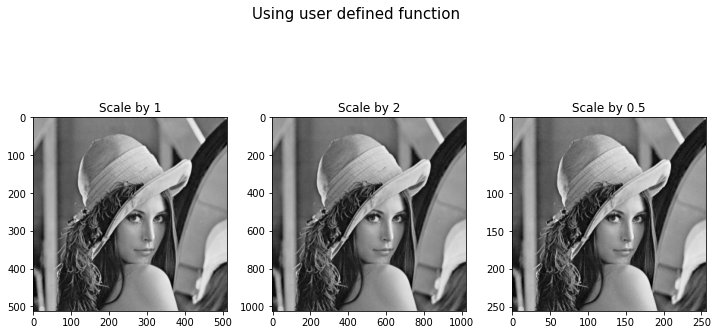

In [10]:
# compare the results while using userdefined bilinear interpolation functions
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.4, top=0.85)

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_1, cmap='gray')
ax1.set_title('Scale by 1')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_2, cmap='gray')
ax2.set_title('Scale by 2')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_3, cmap='gray')
ax3.set_title('Scale by 0.5')

fig.tight_layout()
fig.suptitle("Using user defined function", fontsize=15)
plt.show()

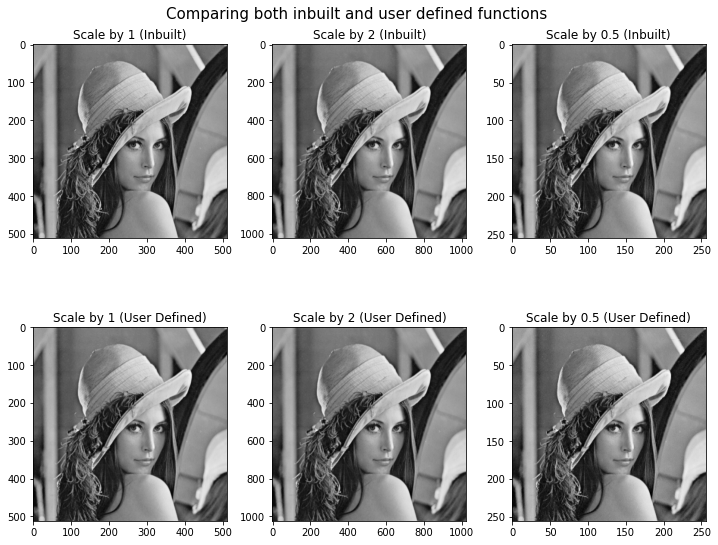

In [11]:
# Compare both userdefined and inbuilt image results by placing the respective scaling side by side (6 subplots)
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.4, top=0.85)

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Scale by 1 (Inbuilt)')

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Scale by 2 (Inbuilt)')

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img3, cmap='gray')
ax3.set_title('Scale by 0.5 (Inbuilt)')

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_1, cmap='gray')
ax4.set_title('Scale by 1 (User Defined)')

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_2, cmap='gray')
ax5.set_title('Scale by 2 (User Defined)')

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(img_3, cmap='gray')
ax6.set_title('Scale by 0.5 (User Defined)')

fig.tight_layout()
fig.suptitle("Comparing both inbuilt and user defined functions", fontsize=15)
plt.show()
